In [1]:
import math

## Aufgabe 1

### (a) Berechnung der Attack Rate

In [7]:
S_inf = 83
S_0 = 254

attack_rate = 1 - (S_inf / S_0)

print(f"Attack Rate = {(attack_rate * 100):.2f}%")

Attack Rate = 67.32%


### (b) Berechnun von alpha, beta und R0

In [8]:
infektions_rate = 11 # in Tagen

alpha = 1 / infektions_rate

R0 = -math.log(S_inf / S_0) / (1 - (S_inf / S_0))

beta = R0 * alpha

print("Alpha:", alpha)
print("Beta:", beta)
print("R0:", R0)

Alpha: 0.09090909090909091
Beta: 0.15103529475936867
R0: 1.6613882423530553


### (c) Initiale Wachstumsrate **r**

In [12]:
r = beta * S_0 - alpha

print(f"r: {r:.2f}")

r: 38.27


### (d) Maximale Anzahl der Infizierten

In [18]:
S_max = alpha / beta

I_max = S_0 + 7 - S_max - S_inf

print(f"Maximale anzahl an Infizierten: {I_max:.0f} Personen")

Maximale anzahl an Infizierten: 177 Personen


### (e) Numerische Lösungen

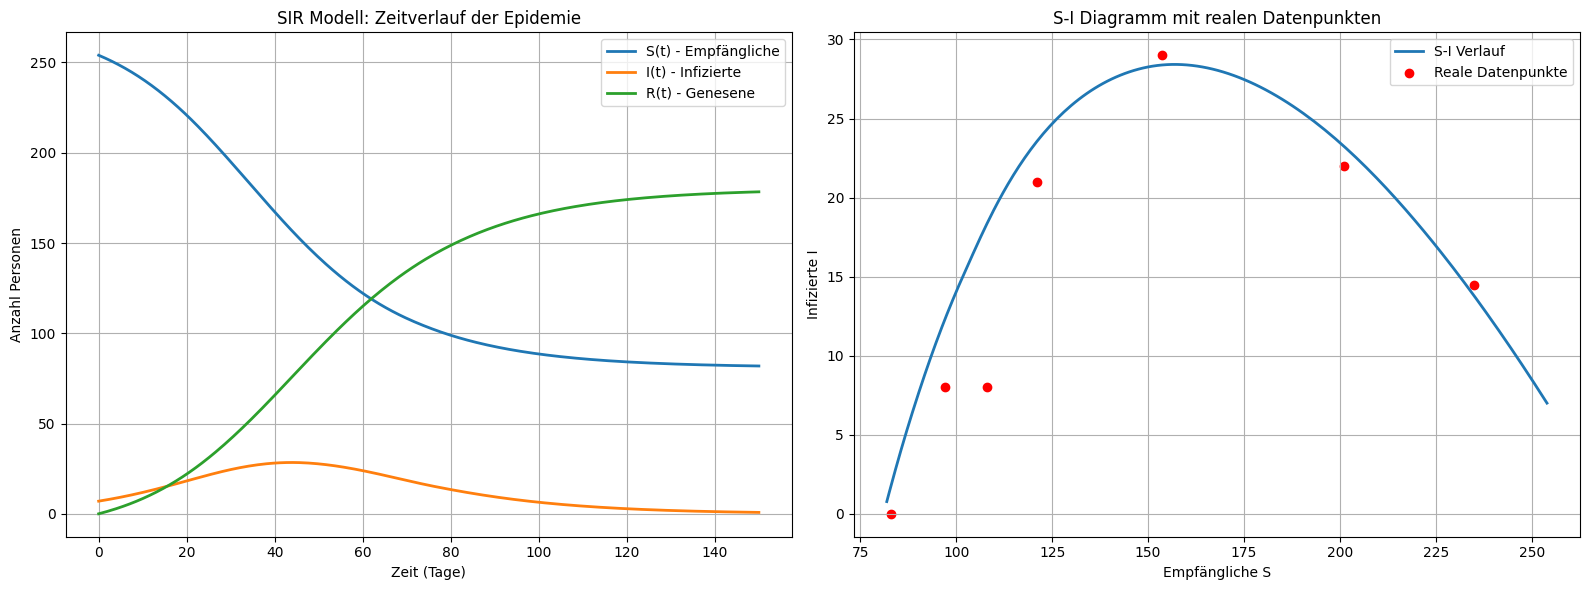

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

I0 = 7     # Anfangswerte für infizierte Personen
R0 = 0     # Anfangswerte für genesene Personen
S0 = S_0   # Anfangswerte für empfängliche Personen
N = S0 + I0 + R0  # Gesamtpopulation

t_span = (0, 150)
t_eval = np.linspace(*t_span, 300)

def sir_model(t, y, beta, alpha):
    S, I, R = y
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - alpha * I
    dR_dt = alpha * I
    return [dS_dt, dI_dt, dR_dt]

y0 = [S0, I0, R0]
solution = solve_ivp(sir_model, t_span, y0, args=(beta, alpha), t_eval=t_eval)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(solution.t, solution.y[0], label='S(t) - Empfängliche', linestyle='-', linewidth=2)
ax1.plot(solution.t, solution.y[1], label='I(t) - Infizierte', linestyle='-', linewidth=2)
ax1.plot(solution.t, solution.y[2], label='R(t) - Genesene', linestyle='-', linewidth=2)
ax1.set_xlabel("Zeit (Tage)")
ax1.set_ylabel("Anzahl Personen")
ax1.set_title("SIR Modell: Zeitverlauf der Epidemie")
ax1.legend()
ax1.grid(True)

ax2.plot(solution.y[0], solution.y[1], label="S-I Verlauf", linewidth=2)
ax2.scatter([235, 201, 153.5, 121, 108, 97, 83], [14.5, 22, 29, 21, 8, 8, 0], color='red', label="Reale Datenpunkte")
ax2.set_xlabel("Empfängliche S")
ax2.set_ylabel("Infizierte I")
ax2.set_title("S-I Diagramm mit realen Datenpunkten")
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()
